# Image Recognition using cifar10 dataset

For this project we are using the cifar10 dataset, which is a dataset of large number of images which have already been classified into 10 different categories. We split this dataset into a training and testing dataset with the aim of seeing if we can build a neural network model which can accurately predict a new image from these 10 categories

## Loading and viewing the dataset images

In [1]:
# import dataset and matplotlib to show data
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow

In [2]:
#List of names for each CIFAR10 class
cifar10_class_names = {
    0: 'Plane',
    1: 'Car',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Boat',
    9: 'Truck'
}

In [3]:
# Load the entire dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

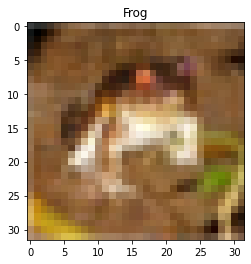

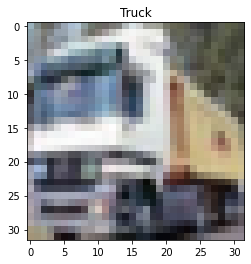

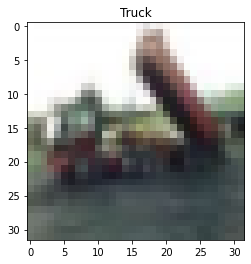

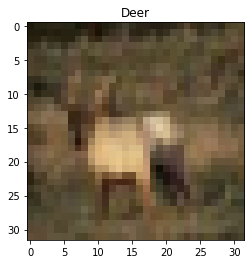

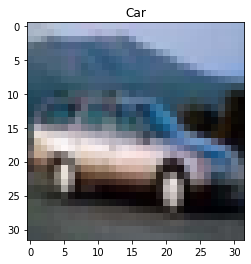

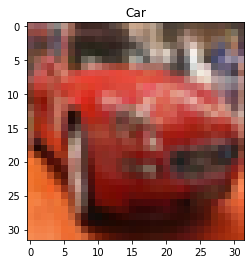

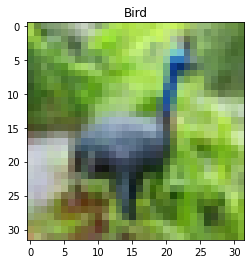

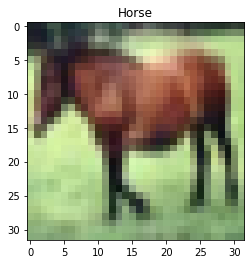

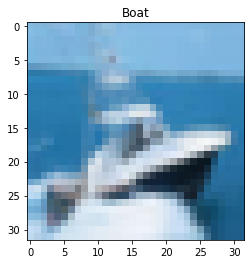

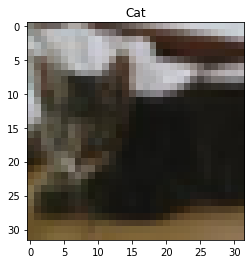

In [4]:
# Loop through each image in the data set, grab an image from the data set, grab the image's expected class id
# We can then draw the image as a plot and show the plot on the screen
for i in range(10):
    sample_image = x_train[i]
    images_class_number = y_train[i][0]
    image_class_name = cifar10_class_names[images_class_number]
    
    plt.imshow(sample_image)
    plt.title(image_class_name)
    plt.show()


In [5]:
# View the raw data for the first image
print(x_train[0])
print(y_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]


In [6]:
# The actual shape of the array
x_train[0].shape

(32, 32, 3)

## Preprocess the data

We must convert the feature data to have values between 0 and 1. We must convert the labels from instead of having 0 to 9, to having 10 numbers with only the correct index set to 1 with all others as 0

In [7]:
# Normalize the data set to 0-to-1 range as neural networks work best when data are floating point numbers between 0-to-1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
# Convert class vectors to binary class matrices, the labels are single values from 0 to 9
# Instead we want each label to be an array with one element set to 1 and the rest set to 0

y_train = tensorflow.keras.utils.to_categorical(y_train, 10)
y_test = tensorflow.keras.utils.to_categorical(y_test, 10)

In [9]:
# We know that the for the first image the label was 6 hence there should be a 1 at index 6 (7th position)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Create and Train the Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten

# Create a model and add layers
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#Print a model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

Convolutional layers are used for translation invariance, a pattern will be seen in an image no matter where it appears in an image. We use 2D convolutional layers because we are working with images.

The first parameter for convolutional layer defines the number of different filters that should be in the layer, each filter is capable of detecting one pattern in the image. The second parameter is the window size for the image tile. The third parameter is for deciding what to do with the edges of the image.

We add a couple more convolutional layers to make the neural network more powerful.

When transitioning from a convolutional layer to a dense layer we need to tell the model we are no longer working with 2D data, so we need to call the flatten model

Max Pooling scales down the output of the convolutional layers by keeping only the largest values and throwing away the smaller ones

We add dropout layers, the idea is that between two different layers we randomly throw away some of the data by cutting connections between layers, this makes the model more robust as it forces the model to learn different methods of achieving the desired result rather than just memorising the training set

The softmax activation function is special for classification with more than one object as it ensures all the output values from this layer add up to one so essentially each ouptut is a percentage likelihood

In [11]:
# Compile the model, this actually creates the model in memory
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/30
1563/1563 [==============================] - 129s 81ms/step - loss: 1.5279 - accuracy: 0.4401 - val_loss: 1.1907 - val_accuracy: 0.5792
Epoch 2/30
1563/1563 [==============================] - 85s 54ms/step - loss: 1.1456 - accuracy: 0.5921 - val_loss: 1.0038 - val_accuracy: 0.6418
Epoch 3/30
1563/1563 [==============================] - 82s 52ms/step - loss: 0.9729 - accuracy: 0.6578 - val_loss: 0.8338 - val_accuracy: 0.7063
Epoch 4/30
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8820 - accuracy: 0.6906 - val_loss: 0.7982 - val_accuracy: 0.7216
Epoch 5/30
1563/1563 [==============================] - 88s 56ms/step - loss: 0.8215 - accuracy: 0.7099 - val_loss: 0.8031 - val_accuracy: 0.7266
Epoch 6/30
1563/1563 [==============================] - 94s 60ms/step - loss: 0.7718 - accuracy: 0.7293 - val_loss: 0.7431 - val_accuracy: 0.7445
Epoch 7/30
1563/1563 [==============================] - 86s 55ms/step - loss: 0.7380 - accuracy: 0.7411 - val_loss: 0.7364 

## Make Predictions using trained model

In [13]:
# Use the trained model to make predictions on new images
from keras.preprocessing import image

In [14]:
# Load an image file to test and resize it to 32x32 pixels as required by the trained model
img = image.load_img('Ex_Files_Deep_Learning_Image_Recog_Upd/Exercise Files/Ch04/cat.png', target_size=(32,32))

In [15]:
# Convert this image to numpy array, and normalise the array between 0-to-1
img_to_test = image.img_to_array(img) / 255

In [16]:
# Add a fourth dimension to image (since keras expects a list of images not just a single image)
import numpy as np
list_of_images = np.expand_dims(img_to_test, axis=0)

In [17]:
#Make prediction using the model
predictions = model.predict(list_of_images)
single_results = predictions[0]
single_results

array([1.89424952e-07, 1.51691482e-09, 2.93059948e-05, 9.97352242e-01,
       9.52463597e-05, 2.36760685e-03, 1.12926886e-04, 4.22569719e-05,
       1.07403110e-07, 9.14801461e-08], dtype=float32)

We get a list of 10 results each of which is a percent likelihood of it belonging to that class, we can clearly see that the 4th class holds the highest percentage hence this will be our prediction for the image

In [25]:
# This prints the category which the model predicts this image to be
most_likely_class = cifar10_class_names[single_results.argmax()]
print('This image is a {} - Likelihood: {:2f}'.format(most_likely_class, single_results.max()))

This image is a Cat - Likelihood: 0.997352


This model correctly predicts cat as the image, with an extremely high accuracy

In [28]:
# We can test the model with a different image e.g. with a car image
img = image.load_img('Ex_Files_Deep_Learning_Image_Recog_Upd/Exercise Files/Ch04/car.png', target_size=(32,32))
img_to_test = image.img_to_array(img) / 255
list_of_images = np.expand_dims(img_to_test, axis=0)

In [29]:
predictions_2 = model.predict(list_of_images)[0]
most_likely_class = cifar10_class_names[predictions_2.argmax()]
print('This image is a {} - Likelihood: {:2f}'.format(most_likely_class, predictions_2.max()))

This image is a Car - Likelihood: 0.879312


The model correctly predicts that this image was a car, with 88% likelihood